In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
data1 = pd.read_csv('1st_simulation.csv', low_memory=False, header="infer")
row_index = data1[data1["tcp.srcport"] == 12345].index
if not row_index.empty:
    # Keep all rows starting from the found index
    data1 = data1.iloc[row_index[0]:]
#print(row_index)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961535 entries, 81 to 961615
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   No.                    961535 non-null  int64  
 1   Time                   961535 non-null  float64
 2   Source                 961535 non-null  object 
 3   Destination            961535 non-null  object 
 4   Protocol               961535 non-null  object 
 5   Length                 961535 non-null  int64  
 6   Info                   961535 non-null  object 
 7   tcp.ack                961535 non-null  int64  
 8   tcp.len                961513 non-null  float64
 9   tcp.checksum           961535 non-null  object 
 10  tcp.window_size_value  961535 non-null  int64  
 11  tcp.stream             961535 non-null  int64  
 12  tcp.time_delta         961535 non-null  float64
 13  tcp.flags.syn          961535 non-null  object 
 14  tcp.flags.ack          961535 non-n

In [3]:
data2 = pd.read_csv('2nd_simulation.csv', low_memory=False, header="infer")
row_index = data2[data2["tcp.srcport"] == 12345].index
if not row_index.empty:
    # Keep all rows starting from the found index
    data2 = data2.iloc[row_index[0]:]
data2.head()

,No.,Time,Source,Destination,Protocol,Length,Info,tcp.ack,tcp.len,tcp.checksum,tcp.window_size_value,tcp.stream,tcp.time_delta,tcp.flags.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.rst,tcp.seq,tcp.srcport,tcp.dstport
97,100,53.319651,127.0.0.1,127.0.0.1,TCP,68,"12345 > 59197 [SYN, ACK] Seq=0 Ack=1 Win=655...",1,0.0,0xfe34,65535,7,0.000100,Set,Set,Not set,Not set,0,12345,59197
98,101,53.319661,127.0.0.1,127.0.0.1,TCP,56,59197 > 12345 [ACK] Seq=1 Ack=1 Win=408256 L...,1,0.0,0xfe28,6379,7,0.000010,Not set,Set,Not set,Not set,1,59197,12345
99,102,53.319668,127.0.0.1,127.0.0.1,TCP,56,[TCP Window Update] 12345 > 59197 [ACK] Seq=...,1,0.0,0xfe28,6379,7,0.000007,Not set,Set,Not set,Not set,1,12345,59197
100,103,53.534244,127.0.0.1,127.0.0.1,TCP,68,59198 > 12345 [SYN] Seq=0 Win=65535 Len=0 MS...,0,0.0,0xfe34,65535,8,0.000000,Set,Not set,Not set,Not set,0,59198,12345
101,104,53.534324,127.0.0.1,127.0.0.1,TCP,68,"12345 > 59198 [SYN, ACK] Seq=0 Ack=1 Win=655...",1,0.0,0xfe34,65535,8,0.000080,Set,Set,Not set,Not set,0,12345,59198


In [4]:
data = pd.concat([data1, data2], ignore_index=True)
data.reset_index(drop=True, inplace = True)
data.info()
data.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019777 entries, 0 to 2019776
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   No.                    int64  
 1   Time                   float64
 2   Source                 object 
 3   Destination            object 
 4   Protocol               object 
 5   Length                 int64  
 6   Info                   object 
 7   tcp.ack                int64  
 8   tcp.len                float64
 9   tcp.checksum           object 
 10  tcp.window_size_value  int64  
 11  tcp.stream             int64  
 12  tcp.time_delta         float64
 13  tcp.flags.syn          object 
 14  tcp.flags.ack          object 
 15  tcp.flags.fin          object 
 16  tcp.flags.rst          object 
 17  tcp.seq                int64  
 18  tcp.srcport            int64  
 19  tcp.dstport            int64  
dtypes: float64(3), int64(8), object(9)
memory usage: 308.2+ MB


RangeIndex(start=0, stop=2019777, step=1)

In [5]:
data[["tcp.flags.syn", "tcp.flags.ack", "tcp.flags.fin", "tcp.flags.rst"]] = data[["tcp.flags.syn", "tcp.flags.ack", "tcp.flags.fin", "tcp.flags.rst"]].astype(str)
data["tcp.flags.syn.bin"] = data["tcp.flags.syn"].map({"Set": 1, "Not set": 0})
data["tcp.flags.ack.bin"] = data["tcp.flags.ack"].map({"Set": 1, "Not set": 0})
data["tcp.flags.fin.bin"] = data["tcp.flags.fin"].map({"Set": 1, "Not set": 0})
data["tcp.flags.rst.bin"] = data["tcp.flags.rst"].map({"Set": 1, "Not set": 0})
data = data[data['Protocol'] == 'TCP']
data.reset_index(drop=True, inplace = True)

In [6]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014523 entries, 0 to 2014522
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   No.                    int64  
 1   Time                   float64
 2   Source                 object 
 3   Destination            object 
 4   Protocol               object 
 5   Length                 int64  
 6   Info                   object 
 7   tcp.ack                int64  
 8   tcp.len                float64
 9   tcp.checksum           object 
 10  tcp.window_size_value  int64  
 11  tcp.stream             int64  
 12  tcp.time_delta         float64
 13  tcp.flags.syn          object 
 14  tcp.flags.ack          object 
 15  tcp.flags.fin          object 
 16  tcp.flags.rst          object 
 17  tcp.seq                int64  
 18  tcp.srcport            int64  
 19  tcp.dstport            int64  
 20  tcp.flags.syn.bin      int64  
 21  tcp.flags.ack.bin      int64  
 22  tcp.flags.fin.bin 

In [7]:
# Create a logical vector indicating whether each column is numeric
is_numeric = data.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))
#tcp.checksum is removed even if it shouldn't be
# Drop columns that are not numeric
df_filtered = data.loc[:, is_numeric]
df_filtered.reset_index(drop=True, inplace = True)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014523 entries, 0 to 2014522
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   No.                    int64  
 1   Time                   float64
 2   Length                 int64  
 3   tcp.ack                int64  
 4   tcp.len                float64
 5   tcp.window_size_value  int64  
 6   tcp.stream             int64  
 7   tcp.time_delta         float64
 8   tcp.seq                int64  
 9   tcp.srcport            int64  
 10  tcp.dstport            int64  
 11  tcp.flags.syn.bin      int64  
 12  tcp.flags.ack.bin      int64  
 13  tcp.flags.fin.bin      int64  
 14  tcp.flags.rst.bin      int64  
dtypes: float64(3), int64(12)
memory usage: 230.5 MB


In [8]:
#dataset labelling
attack_list = []
for i in range(len(df_filtered["No."])):
    if (308190)<= i<=(601436):
        if df_filtered["tcp.srcport"][i] == 12345 or df_filtered["tcp.dstport"][i] == 12345:
            attack_list.append(0)
        else:
            attack_list.append(1)
    elif (1348065)<= i<=(1751525):
        if df_filtered["tcp.srcport"][i] == 12345 or df_filtered["tcp.dstport"][i] == 12345:
            attack_list.append(0)
        else:
            attack_list.append(1)
    else: 
        attack_list.append(0)
print(f"Proportion of normal and attack traffic: {sum(attack_list)/len(attack_list)}")

Proportion of normal and attack traffic: 0.33127097580916176


In [13]:
DF_dec_tree = df_filtered.drop(["No.", "Time", "tcp.srcport", "tcp.dstport"], axis = 1)
X_class = DF_dec_tree.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_class, attack_list, test_size=0.4, random_state=1)

classifier = DecisionTreeClassifier(random_state=6, max_depth = 3)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    538694
           1       1.00      0.99      1.00    267116

    accuracy                           1.00    805810
   macro avg       1.00      1.00      1.00    805810
weighted avg       1.00      1.00      1.00    805810



In [14]:
attack_positions = [index for index, value in enumerate(y_pred) if value == 1]
true_attack_positions = [index for index, value in enumerate(y_test) if value == 1]
print(attack_positions[:1000])
print(true_attack_positions[:1000])

[3, 4, 7, 11, 14, 18, 20, 22, 26, 29, 31, 33, 35, 37, 43, 44, 45, 48, 57, 58, 61, 64, 67, 78, 79, 80, 81, 82, 83, 85, 94, 97, 98, 101, 104, 105, 107, 108, 111, 120, 125, 130, 133, 136, 137, 138, 144, 146, 149, 150, 151, 152, 157, 160, 161, 163, 164, 166, 167, 171, 179, 186, 189, 190, 191, 198, 199, 200, 201, 204, 207, 214, 215, 217, 219, 220, 226, 227, 237, 241, 244, 245, 248, 253, 255, 261, 262, 264, 268, 270, 275, 280, 285, 286, 291, 297, 298, 299, 300, 306, 311, 312, 315, 318, 323, 324, 325, 326, 328, 330, 333, 344, 348, 352, 353, 355, 361, 363, 367, 369, 370, 378, 393, 394, 410, 415, 420, 423, 425, 426, 427, 436, 437, 438, 446, 452, 453, 457, 461, 467, 470, 471, 477, 481, 484, 488, 494, 495, 497, 501, 502, 503, 509, 510, 511, 512, 514, 515, 521, 522, 532, 533, 534, 543, 547, 550, 553, 555, 560, 568, 569, 570, 571, 572, 576, 582, 584, 586, 589, 590, 592, 595, 604, 606, 608, 611, 614, 615, 616, 618, 622, 625, 628, 630, 635, 638, 640, 641, 645, 646, 654, 655, 662, 666, 669, 670, 674, 

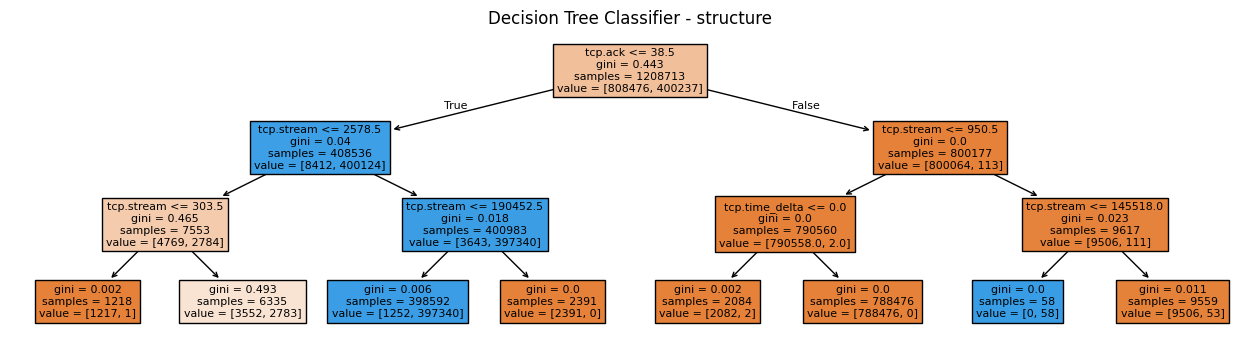

In [14]:
# Visualize the decision tree (optional)
features = [i for i in list(DF_dec_tree)]
plt.figure(figsize=(16, 4))
plot_tree(classifier, feature_names=features, filled=True)
plt.title('Decision Tree Classifier - structure')
plt.show()

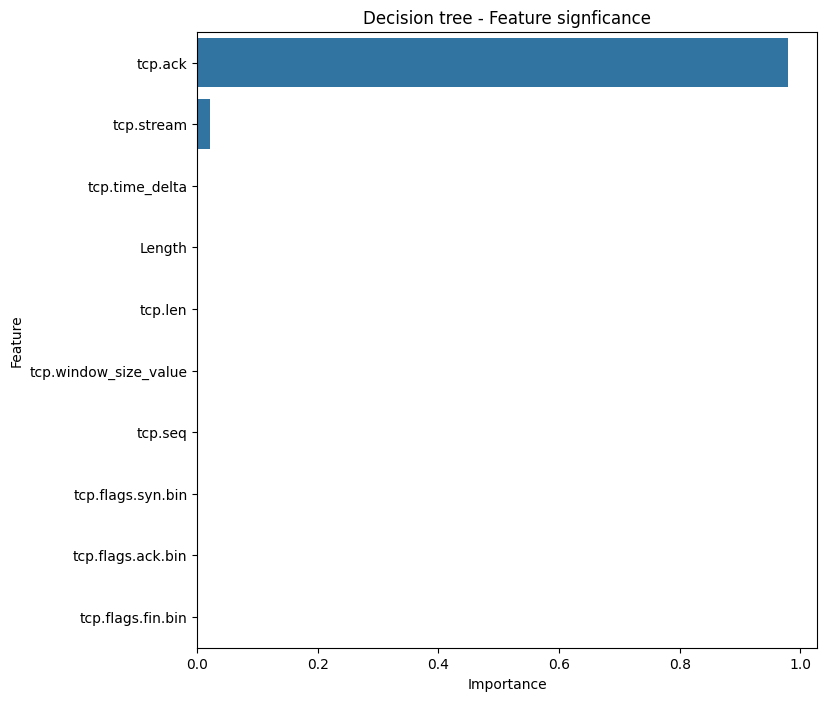

In [14]:
#extract the importance of each feature for the decision tree's predictions from best estimator
feature_importances = classifier.feature_importances_
features = [i for i in list(DF_dec_tree)]
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df.head(10)

plt.figure(figsize=(8, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df[:][:10])
plt.title('Decision tree - Feature signficance')
plt.show()

In [21]:
# Perform cross-validation
from sklearn.model_selection import RepeatedKFold
RKF = RepeatedKFold(n_splits = 5, n_repeats = 5, random_state=0)
cv_scores = cross_val_score(classifier, X_test, y_test, cv=RKF, scoring='accuracy')

# compute the avg accuracy and std
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)
print(f'On average the cross-validated Accuracy is {cv_mean} with std {cv_std}')

On average the cross-validated Accuracy is 0.9967329767563075 with std 0.00012103437921011557


In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

# Set the number of cores to use (e.g., 4)
os.environ['LOKY_MAX_CPU_COUNT'] = '5'

# Preprocessing: Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(DF_dec_tree)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Get cluster labels
pred_labels = kmeans.labels_
#flipped_pred_labels = [1 - x for x in pred_labels]

#accuracy
print(classification_report(attack_list, pred_labels))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89   1347170
           1       0.98      0.50      0.66    667353

    accuracy                           0.83   2014523
   macro avg       0.89      0.75      0.77   2014523
weighted avg       0.86      0.83      0.81   2014523



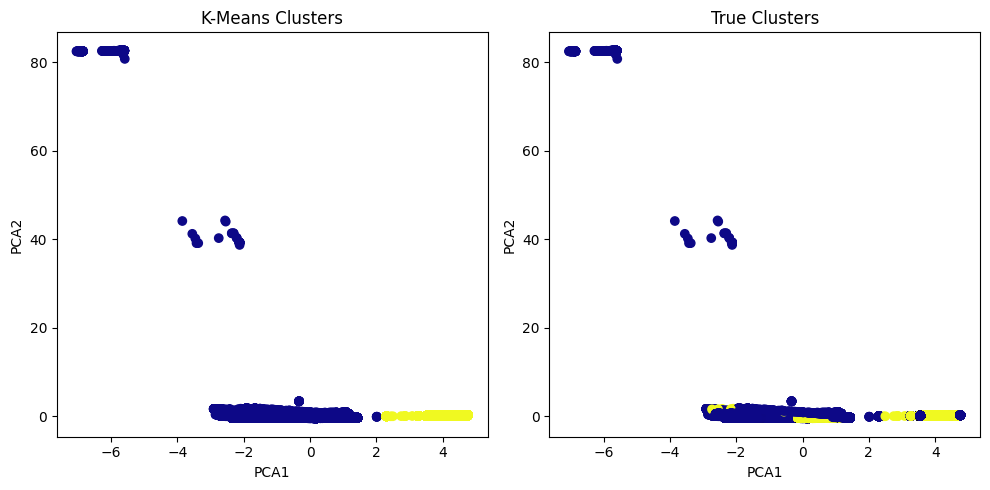

In [19]:
#visualise with PCA
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  

# Plot for K-Means clusters
axes[0].scatter(reduced_features[:, 0], reduced_features[:, 1], c=pred_labels, cmap='plasma')
axes[0].set_title('K-Means Clusters')
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA2')

# Plot for True clusters
axes[1].scatter(reduced_features[:, 0], reduced_features[:, 1], c=attack_list, cmap='plasma')
axes[1].set_title('True Clusters')
axes[1].set_xlabel('PCA1')
axes[1].set_ylabel('PCA2')

plt.tight_layout()
plt.show()

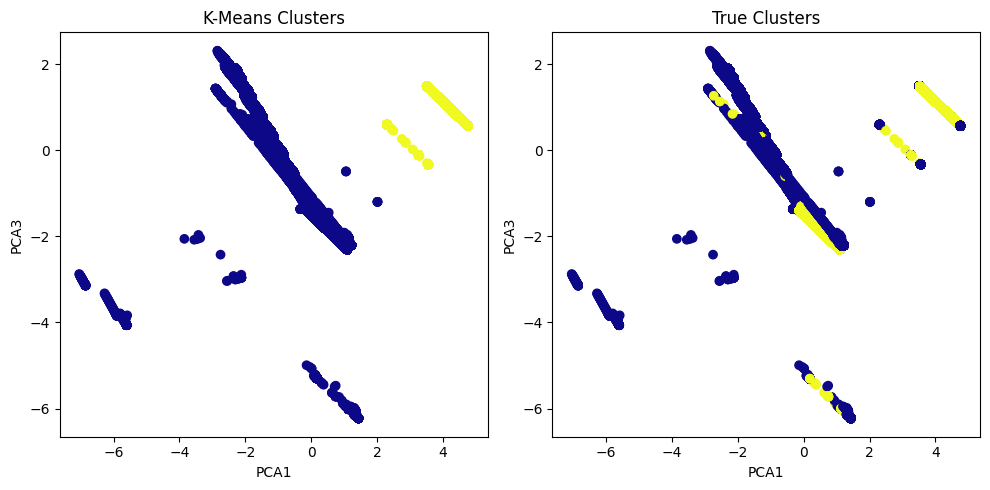

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  

# Plot for K-Means clusters
axes[0].scatter(reduced_features[:, 0], reduced_features[:, 2], c=pred_labels, cmap='plasma')
axes[0].set_title('K-Means Clusters')
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA3')

# Plot for True clusters
axes[1].scatter(reduced_features[:, 0], reduced_features[:, 2], c=attack_list, cmap='plasma')
axes[1].set_title('True Clusters')
axes[1].set_xlabel('PCA1')
axes[1].set_ylabel('PCA3')

plt.tight_layout()
plt.show()